<font color="grey" size="6" style="font-family:sans-serif" bold=True>Capstone Project : Mahindra First Choice Services</font>

# Introduction

## Business Overview

- <p>Mahindra First Choice Services (MFC Services) is a part of the USD 20.7 billion Mahindra group and is India's largest chain of multi-brand car and two-wheeler service workshops with a network of 500 franchise partners present in over 350 towns across 26 states.</p>
- <p>Each four-wheeler service workshop is spread over an area of 7000 sq. ft- 15000 sq. ft and two-wheeler workshop area ranges from 600 sq. ft- 1200 sqft. MFC Services poised to deliver world-class automobile maintenance and service solutions.</p>
- <p>At MFC Services, customers can save up to 20 percent servicing costs as compared to authorized service centers. With the motto to provide right inspection, right parts and right billing, Car and Bike owners can now 'Make the Right Choice' by choosing MFC Services to solve their woes.</p>

## Problem Statement

- <b>Building a machine learning model for Multi-Output Regression to predict the total cost of the service and time required to complete that service.</b>

## Stakeholder

- <b>Chief Financial Officer (CFO)</b>
- Head of Customer Care Department
- Manager of Plants

## Data Science Metric

- <b>Mean Absolute Error (MAE)</b>
- <b>Root Mean Square Error (RMSE)</b>
- <b>R-Sqaured Score(R2)</b>

# Load Data

## Load Libraries

In [1]:
# Load Libraries

import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import seaborn as sns #visualization
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import json #exporting columns
import pickle #saving the model
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.preprocessing import LabelEncoder #Encoding technique
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.linear_model import Ridge #Ridge Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV #Hyper parameter tuning
from sklearn.feature_selection import RFE,SelectKBest
from sklearn.feature_selection import f_classif, chi2
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pickle
from warnings import simplefilter #Filtering warnings

print('Setup Completed.')

Setup Completed.


## Load Dataset

In [2]:
# Load train data

serv_df = pd.read_csv('./Data/master_data.csv')

print('Shape of the data:', serv_df.shape)

Shape of the data: (2993983, 17)


In [3]:
serv_df.head().T

,0,1,2,3,4
KMs Reading,49317,49317,49317,49317,49317
Labour Total,1203.14,1203.14,1203.14,1203.14,1203.14
Order Type,Paid Service,Paid Service,Paid Service,Paid Service,Paid Service
Parts Total,2348.75,2348.75,2348.75,2348.75,2348.75
Total Value,4051.95,4051.95,4051.95,4051.95,4051.95
City,Thane,Thane,Thane,Thane,Thane
State,Maharashtra,Maharashtra,Maharashtra,Maharashtra,Maharashtra
Sales organization,MFCD,MFCD,MFCD,MFCD,MFCD
Car Model,GENERAL MOTORS SPARK,GENERAL MOTORS SPARK,GENERAL MOTORS SPARK,GENERAL MOTORS SPARK,GENERAL MOTORS SPARK
Order Item,10,20,30,40,50


# Data Analysis

## Statistics of Data

In [4]:
serv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
KMs Reading,2993983.0,82495.265545,117711.520581,1.000,39657.00,65210.00,98933.00,9999999.00
Labour Total,2993983.0,3354.764342,7583.859376,-137.000,599.96,1416.96,3301.20,323000.00
Parts Total,2993983.0,9171.690002,22693.626194,-0.010,1094.16,3061.60,7891.57,598003.48
Total Value,2993983.0,14237.549769,29832.221440,-137.000,2396.80,5526.99,13151.52,648203.49
Order Item,2993983.0,100.642756,136.409251,10.000,30.00,60.00,120.00,4830.00
Order Quantity,2993983.0,43.387604,326.275124,0.001,1.00,1.00,4.00,38000.00
Net value,2993983.0,730.504090,1953.305767,-555.010,94.33,283.52,707.36,510644.30
Cust Count,2993983.0,7515.113345,5908.538316,1.000,2001.00,7228.00,11511.00,18547.00
Plant Count,2993983.0,27.217948,15.138551,1.000,11.00,40.00,42.00,42.00
Service Hours,2993983.0,161.460298,429.906439,0.000,6.00,44.00,136.00,17453.00


## Categorical Vs Numerical features

In [3]:
# Cat Vs Num column

cat_col = serv_df.select_dtypes(exclude=np.number).columns
num_col = serv_df.select_dtypes(include=np.number).columns

In [4]:
# Display categorical and numerical columns

print('Total Categorical Coulmns : ', len(cat_col), "\n")
print("Categorical columns :", list(cat_col), "\n")
print('Total Numerical Coulmns : ', len(num_col), "\n")
print("Numerical columns :", list(num_col), "\n")

Total Categorical Coulmns :  7 

Categorical columns : ['Order Type', 'City', 'State', 'Sales organization', 'Car Model', 'Item Category', 'Target quantity UoM'] 

Total Numerical Coulmns :  10 

Numerical columns : ['KMs Reading', 'Labour Total', 'Parts Total', 'Total Value', 'Order Item', 'Order Quantity', 'Net value', 'Cust Count', 'Plant Count', 'Service Hours'] 



## Unique values in categorical columns

In [7]:
# Check all the unique values from each of the columns

for col in cat_col:
    print('Number of unique values for column', col, serv_df[col].nunique())
    print('Unique values of column', col, serv_df[col].unique(), '\n')

Number of unique values for column Order Type 8
Unique values of column Order Type ['Paid Service' 'SMC Value Package' 'Running Repairs' 'Accidental'
 'SMC Redemption' 'Repeat Order' 'Mechanical' 'WBW Order'] 

Number of unique values for column City 190
Unique values of column City ['Thane' 'Pune' 'Nashik' 'Hyderabad' 'Chennai' 'Vapi' 'Surat' 'Bengaluru'
 'Nellore' 'Coimbatore' 'Ghaziabad' 'Kochi' 'Greater Noida' 'Faridabad'
 'Navi Mumbai' 'Nagpur' 'Ludhiana' 'Mohali' 'Panchkula' 'Puducherry'
 'Ranipet' 'Villupuram' 'Chidambaram' 'Neyveli' 'Ambur' 'Kolhapur' 'Salem'
 'Thanjavur' 'Tiruchirappalli' 'Moga' 'Zirakpur' 'Aurangabad' 'Madurai'
 'Kurnool' 'Boripardhi' 'Shirur' 'Ahmednagar' 'Meerut' 'Tuticorin'
 'Chhindwara' 'Tirupur' 'Pollachi' 'Dharmapuri' 'Rohtak' 'Ongole'
 'Rishikesh' 'Abohar' 'Raipur' 'Shimoga' 'Chengalpattu' 'Una'
 'Rajahmundry' 'Sonepat' 'Thirupathi' 'Shrigonda' 'Kottayam' 'Nagercoil'
 'Hassan' 'Khammam' 'Hisar' 'Agra' 'Tirunelveli' 'Mysore' 'Anantapur'
 'Indore' 'Vijay

Number of unique values for column Item Category 4
Unique values of column Item Category ['P002' 'P001' 'P010' 'P011'] 

Number of unique values for column Target quantity UoM 3
Unique values of column Target quantity UoM ['EA' 'L' 'MIN'] 



## Null/Missing value analysis

In [8]:
serv_df.isnull().sum()

KMs Reading            0
Labour Total           0
Order Type             0
Parts Total            0
Total Value            0
City                   0
State                  0
Sales organization     0
Car Model              0
Order Item             0
Item Category          0
Order Quantity         0
Target quantity UoM    0
Net value              0
Cust Count             0
Plant Count            0
Service Hours          0
dtype: int64

# Feature Engineering

## Numerical features(Outliers)

In [9]:
# Plot boxplot

def plot_box(data, cols):
    for num in cols:
        plt.figure(figsize=(8,6))
        sns.boxplot(y=num, data=data)
        plt.xlabel(num.upper(), fontsize=12)
        plt.title("Box plot for "+num, fontsize=12)
        plt.xticks(rotation=30)
    plt.show()

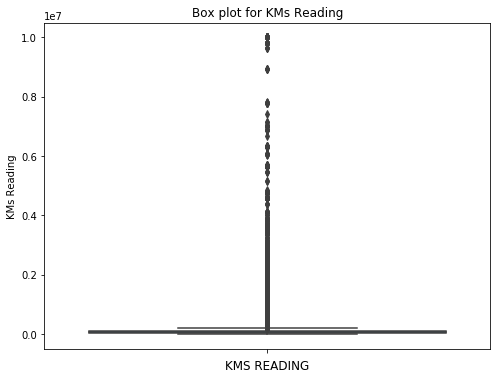

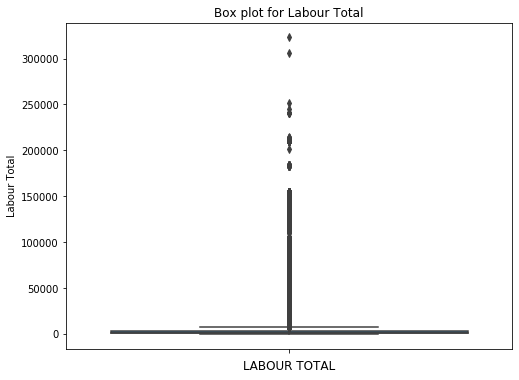

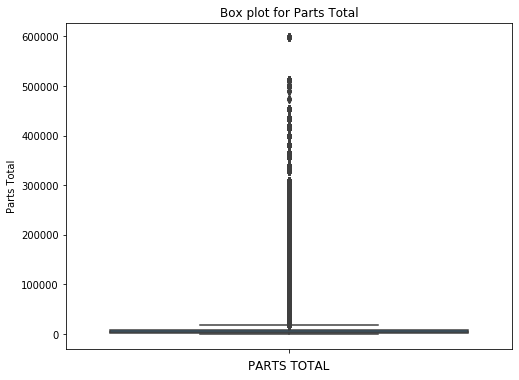

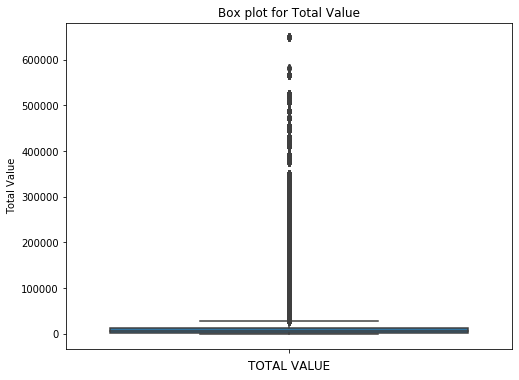

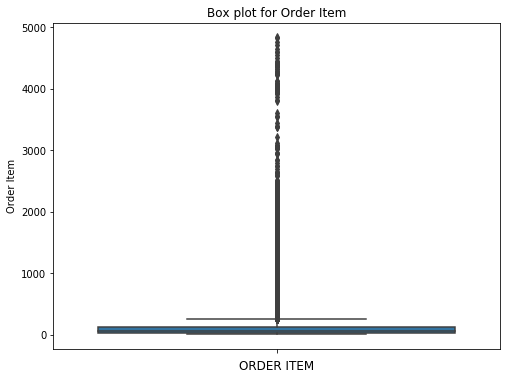

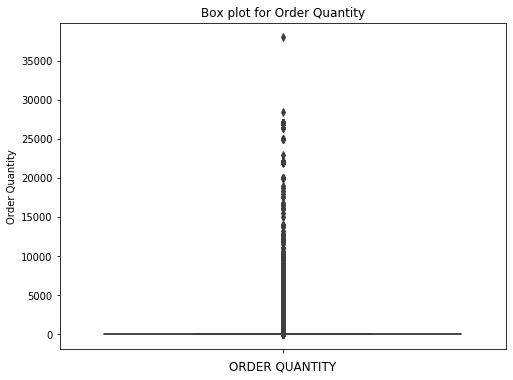

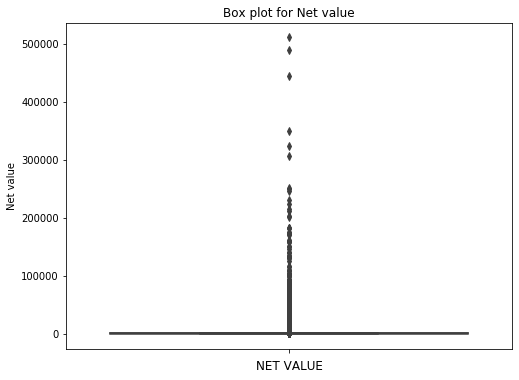

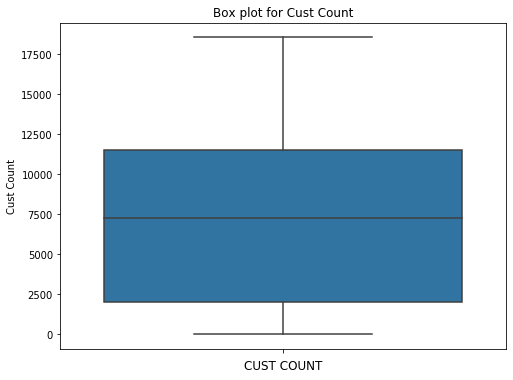

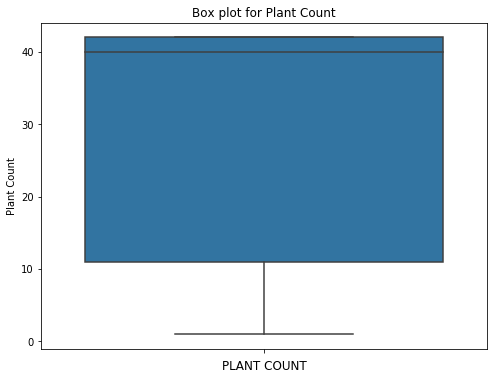

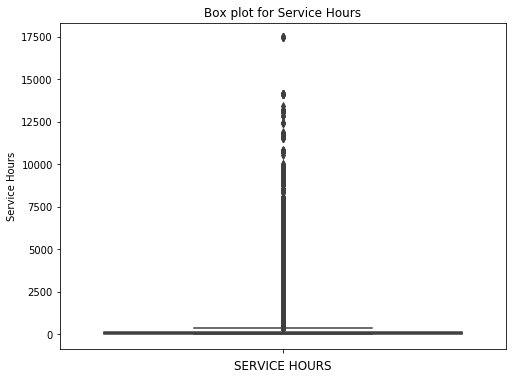

In [10]:
# Boxplot for outliers in numerical features

plot_box(serv_df, num_col)

In [11]:
serv_df.shape

(2993983, 17)

## Handling Outliers

In [5]:
def removing_outliers(cols):
    for col in cols:
        print('Column Name:', col)
        min_thresold, max_thresold = serv_df[col].quantile([0.001, 0.999])
        print('Minimum threshold value for', col, min_thresold) 
        print('Maximum threshold value for', col, max_thresold)
        outlier_count = (serv_df[(serv_df[col]>max_thresold) | (serv_df[col]<min_thresold)]).shape[0]
        print('Count of Outliers for', col, outlier_count)
        serv_df.drop(serv_df[(serv_df[col]>max_thresold) | (serv_df[col]<min_thresold)].index, inplace=True)
        print('Outliers removed from', col)
        print('--------------------------------------------------------------------------------', '\n')

In [6]:
removing_outliers(num_col)

Column Name: KMs Reading
Minimum threshold value for KMs Reading 1.0
Maximum threshold value for KMs Reading 1411289.0
Count of Outliers for KMs Reading 2991
Outliers removed from KMs Reading
-------------------------------------------------------------------------------- 

Column Name: Labour Total
Minimum threshold value for Labour Total 0.0
Maximum threshold value for Labour Total 98775.93
Count of Outliers for Labour Total 2840
Outliers removed from Labour Total
-------------------------------------------------------------------------------- 

Column Name: Parts Total
Minimum threshold value for Parts Total 0.0
Maximum threshold value for Parts Total 255784.83
Count of Outliers for Parts Total 2991
Outliers removed from Parts Total
-------------------------------------------------------------------------------- 

Column Name: Total Value
Minimum threshold value for Total Value 0.0
Maximum threshold value for Total Value 258511.99
Count of Outliers for Total Value 2899
Outliers remo

In [13]:
serv_df.describe().T

,count,mean,std,min,25%,50%,75%,max
KMs Reading,2966936.0,80230.962068,77506.917879,1.00,39712.00,65208.00,98800.00,1411289.00
Labour Total,2966936.0,3113.020828,5914.214138,0.00,599.97,1409.83,3263.15,97600.50
Parts Total,2966936.0,8406.309422,17940.904142,0.00,1090.73,3042.24,7751.78,248580.77
Total Value,2966936.0,13155.369784,24275.780204,0.00,2383.41,5478.92,12916.53,258511.99
Order Item,2966936.0,97.070284,118.315315,10.00,30.00,60.00,120.00,1290.00
Order Quantity,2966936.0,39.529613,218.000104,0.01,1.00,1.00,4.00,3000.00
Net value,2966936.0,686.400446,1345.625802,0.00,94.01,281.16,700.01,20366.14
Cust Count,2966936.0,7539.589532,5901.937772,72.00,2001.00,7228.00,11511.00,18547.00
Plant Count,2966936.0,27.235856,15.140612,1.00,11.00,40.00,42.00,42.00
Service Hours,2966936.0,146.722102,331.239158,0.00,6.00,43.00,127.00,4409.00


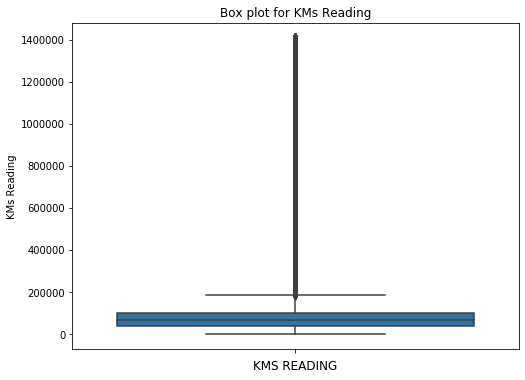

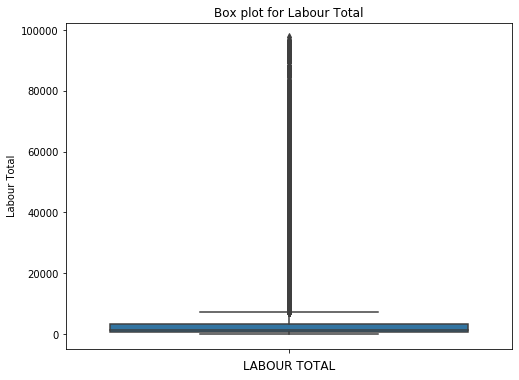

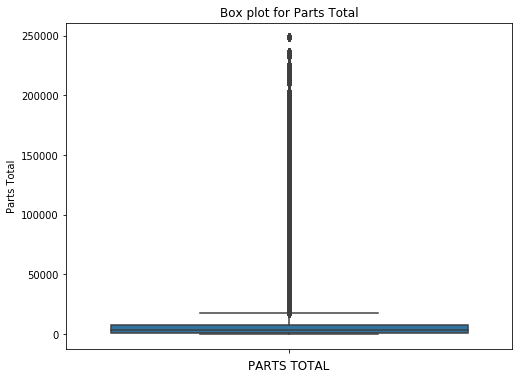

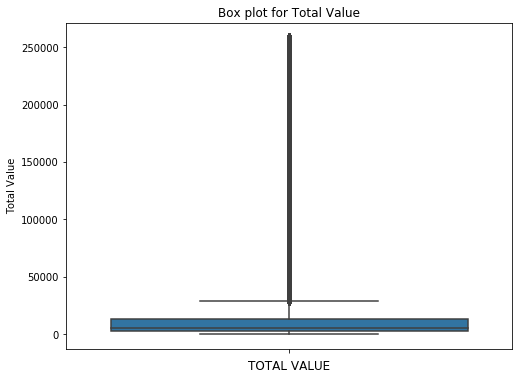

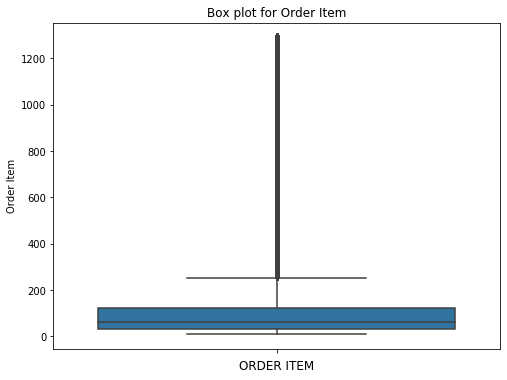

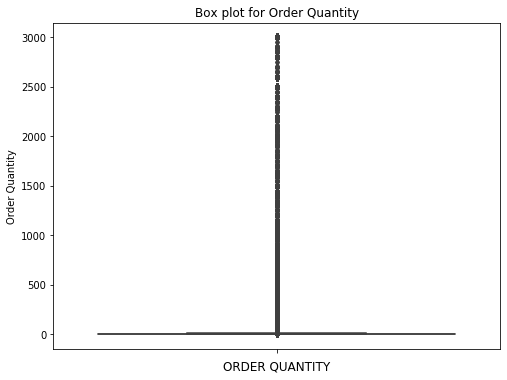

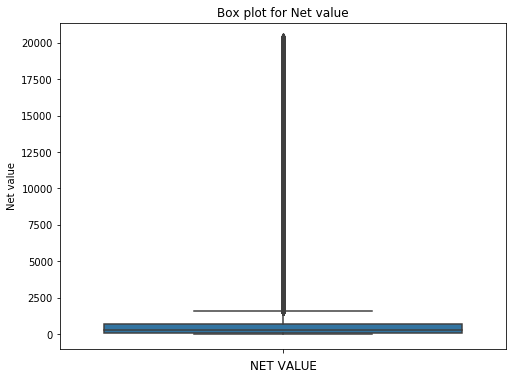

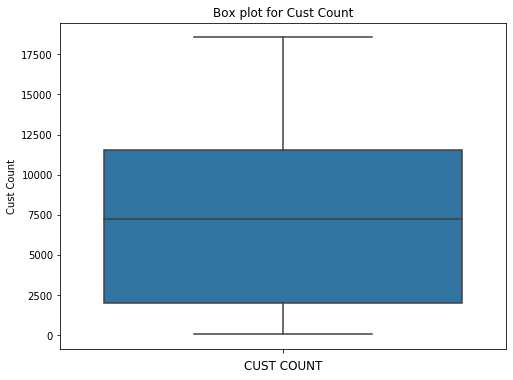

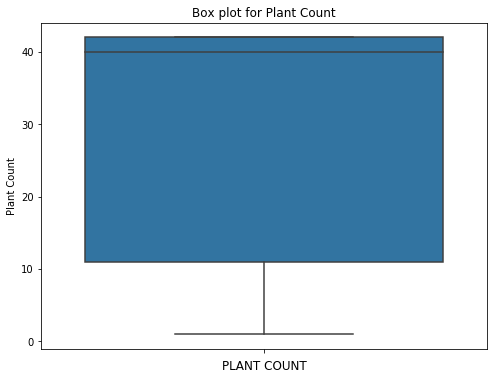

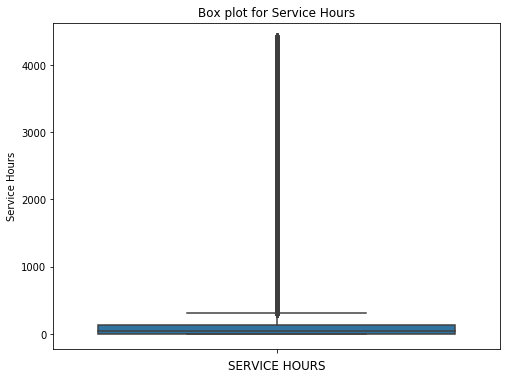

In [14]:
# Box plot after handling outliers

plot_box(serv_df, num_col)

## Categorical features(Encoding)

### One Hot Encoding

In [7]:
# One hot encoding on selected columns

encode_df = serv_df.copy()
one_hot_col = ['Order Type', 'Sales organization', 'Item Category', 'Target quantity UoM']

X_cat = encode_df[one_hot_col]
X_cat.head(2)
X_cat_one_hot_train = pd.get_dummies(X_cat, drop_first=True)

#Merge With original df
cat_proc_columns = X_cat_one_hot_train.columns
for col in cat_proc_columns:
    encode_df[col] = X_cat_one_hot_train[col]
    
encode_df.drop(columns = one_hot_col, axis=1, inplace=True)
print(encode_df.shape)

(2966936, 29)


### Frequency Encoding

In [8]:
# Frequency encoding on selected columns

frequency = encode_df.groupby('Car Model').size()/len(encode_df)
encode_df.loc[:,'Car_Model_fcode'] = encode_df['Car Model'].map(frequency)

# Drop same columns
#encode_df.drop(columns='Car Model', axis=1, inplace=True)

print(encode_df.shape)

(2966936, 30)


# Feature Importance

## Input sample data

In [48]:
# Take sample from data

sample_df = encode_df.sample(n=50000)

In [49]:
# Defining dependent and independent variables

X = sample_df[['KMs Reading', 'Labour Total', 'Parts Total', 'Order Item', 'Order Quantity', 'Net value',
       'Cust Count', 'Plant Count', 'Order Type_Mechanical', 'Order Type_Paid Service', 'Order Type_Repeat Order',
       'Order Type_Running Repairs', 'Order Type_SMC Redemption', 'Order Type_SMC Value Package', 'Order Type_WBW Order',
       'Sales organization_MFCB', 'Sales organization_MFCC', 'Sales organization_MFCD', 'Sales organization_MFCS',
       'Item Category_P002', 'Item Category_P010', 'Item Category_P011', 'Target quantity UoM_L', 'Target quantity UoM_MIN',
        'Car_Model_fcode']]

y = sample_df[['Total Value', 'Service Hours']]

## Co-relation Matrix

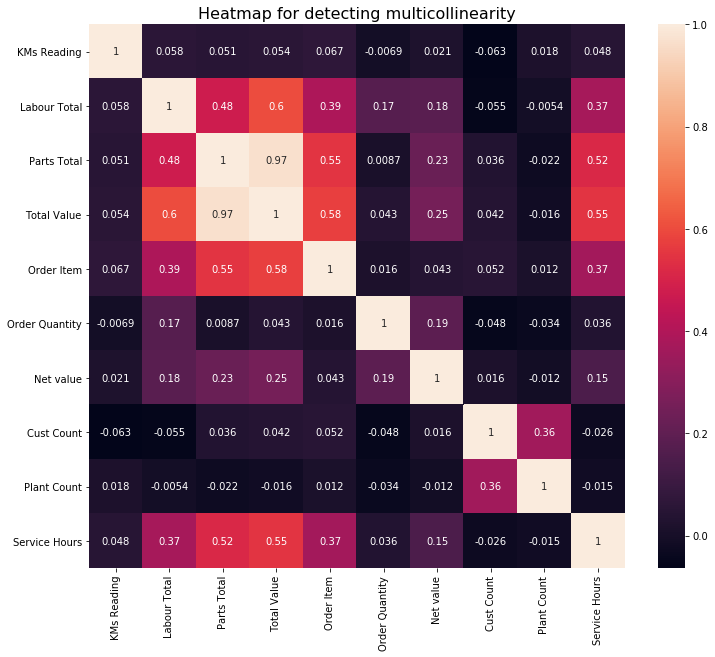

In [19]:
# Apply Co-relation on numerical column

fig = plt.figure(figsize=(12, 10))
sns.heatmap(serv_df[num_col].corr(), annot=True)
plt.title('Heatmap for detecting multicollinearity', fontsize=16)
plt.show()

<b>Insight:</b> <br>
- Both the target variables i.e. Total Value and Service Hours are highly co-related with Labour Total, Parts Total, Order Item etc.

## Extra Trees Regressor

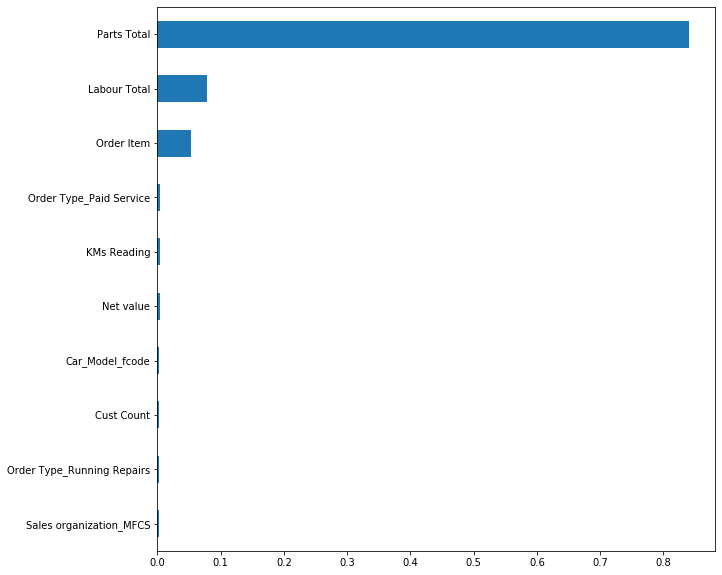

In [59]:
plt.figure(figsize=(10, 10))
# Build a forest and compute the feature importances
forest = ExtraTreesRegressor(n_estimators=100, random_state=42)
forest.fit(X, y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

In [60]:
feat_importances.nlargest(25)

Parts Total                     0.840299
Labour Total                    0.077940
Order Item                      0.053440
Order Type_Paid Service         0.003716
KMs Reading                     0.003449
Net value                       0.003371
Car_Model_fcode                 0.002789
Cust Count                      0.002762
Order Type_Running Repairs      0.002659
Sales organization_MFCS         0.001907
Plant Count                     0.001762
Order Quantity                  0.001048
Item Category_P010              0.000866
Sales organization_MFCD         0.000672
Sales organization_MFCC         0.000650
Order Type_Mechanical           0.000517
Item Category_P002              0.000487
Target quantity UoM_L           0.000408
Target quantity UoM_MIN         0.000390
Sales organization_MFCB         0.000374
Item Category_P011              0.000348
Order Type_SMC Value Package    0.000087
Order Type_SMC Redemption       0.000060
Order Type_WBW Order            0.000000
Order Type_Repea

## Decision Tree Regressor

Feature: 0, Score: 0.00485
Feature: 1, Score: 0.03511
Feature: 2, Score: 0.94333
Feature: 3, Score: 0.00226
Feature: 4, Score: 0.00089
Feature: 5, Score: 0.00264
Feature: 6, Score: 0.00313
Feature: 7, Score: 0.00074
Feature: 8, Score: 0.00024
Feature: 9, Score: 0.00058
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00150
Feature: 12, Score: 0.00005
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00011
Feature: 16, Score: 0.00042
Feature: 17, Score: 0.00016
Feature: 18, Score: 0.00089
Feature: 19, Score: 0.00018
Feature: 20, Score: 0.00026
Feature: 21, Score: 0.00007
Feature: 22, Score: 0.00009
Feature: 23, Score: 0.00042
Feature: 24, Score: 0.00208


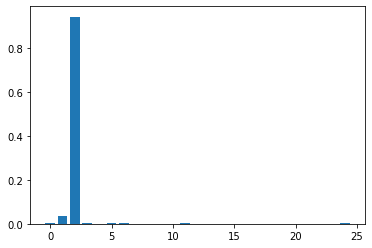

In [61]:
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Random Forest Regressor

Feature: 0, Score: 0.00427
Feature: 1, Score: 0.03533
Feature: 2, Score: 0.94331
Feature: 3, Score: 0.00259
Feature: 4, Score: 0.00087
Feature: 5, Score: 0.00314
Feature: 6, Score: 0.00301
Feature: 7, Score: 0.00095
Feature: 8, Score: 0.00012
Feature: 9, Score: 0.00042
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00081
Feature: 12, Score: 0.00004
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00015
Feature: 16, Score: 0.00035
Feature: 17, Score: 0.00023
Feature: 18, Score: 0.00114
Feature: 19, Score: 0.00012
Feature: 20, Score: 0.00035
Feature: 21, Score: 0.00017
Feature: 22, Score: 0.00017
Feature: 23, Score: 0.00010
Feature: 24, Score: 0.00237


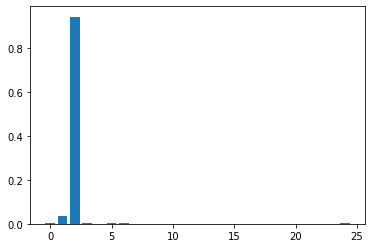

In [62]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Model Building

## Multioutput Regression With Cross-Validation

In [52]:
# evaluate multioutput regression model with k-fold cross-validation

def cross_validation(model_values, X_data, y_data):
    '''
    evaluate multioutput regression model with k-fold cross-validation
    '''
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=42, test_size=0.2)
    
    Regressor = []
    RMSE_mean = []
    MAE_mean = []
    R2_mean = []
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
    
    for name, model in model_values.items():
        # evaluate the model and collect the scores
        rmse_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
        mae_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
        r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
        
        # force the scores to be positive
        rmse_scores = absolute(rmse_scores)
        mae_scores = absolute(mae_scores)
        r2_scores = absolute(r2_scores)
        
        Regressor.append(name)
        RMSE_mean.append(round(mean(rmse_scores), 2))
        MAE_mean.append(round(mean(mae_scores), 2))
        R2_mean.append(round(mean(r2_scores), 2))
    
    results = pd.DataFrame({'Model':Regressor, 'RMSE Score':RMSE_mean, 'MAE Score':MAE_mean, 'R2 Score':R2_mean})
    print(results)

In [35]:
# Regression models

models = {
          'Linear Regression':LinearRegression(),
          'KNeighbors Regressor':KNeighborsRegressor(),
          'Decision Tree Regression': DecisionTreeRegressor(),
          'Random Forest Regression':RandomForestRegressor()
          }

In [36]:
# Call Model building function

cross_validation(models, X, y)

                      Model  RMSE Score  MAE Score  R2 Score
0         Linear Regression     2330.87     973.73      0.64
1      KNeighbors Regressor     2421.53     964.74      0.62
2  Decision Tree Regression     2559.34     830.10      0.42
3  Random Forest Regression     1904.27     702.39      0.71


## Direct Multioutput Regression with Linear SVR

In [55]:
# Evaluate multioutput regression model with Linear SVR(Support Vector Regression)

# define base model
model = LinearSVR()

# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)

# evaluate the model and collect the scores
rmse_scores = cross_val_score(wrapper, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
mae_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
r2_scores = cross_val_score(wrapper, X, y, scoring='r2', cv=cv, n_jobs=-1)

# force the scores to be positive
rmse_scores = absolute(rmse_scores)
mae_scores = absolute(mae_scores)
r2_scores = absolute(r2_scores)

print('Model : MultiOutput Regressor with Linear SVR')
print('RMSE Score :', round(mean(rmse_scores), 2))
print('MAE Score :', round(mean(mae_scores), 2))
print('R2 Score :', round(mean(r2_scores), 2))

Model : MultiOutput Regressor with Linear SVR
RMSE Score : 3679.56
MAE Score : 1983.42
R2 Score : 0.49


## Chained Multioutput Regression with Linear SVR

In [53]:
# Evaluate Chained Multioutput Regression model with Linear SVR(Support Vector Regression)

# define base model
model = LinearSVR()

# define the chained multioutput wrapper model
wrapper = RegressorChain(model)

# evaluate the model and collect the scores
rmse_scores = cross_val_score(wrapper, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
mae_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
r2_scores = cross_val_score(wrapper, X, y, scoring='r2', cv=cv, n_jobs=-1)

# force the scores to be positive
rmse_scores = absolute(rmse_scores)
mae_scores = absolute(mae_scores)
r2_scores = absolute(r2_scores)

print('Model : Chained MultiOutput Regressor with Linear SVR')
print('RMSE Score :', round(mean(rmse_scores), 2))
print('MAE Score :', round(mean(mae_scores), 2))
print('R2 Score :', round(mean(r2_scores), 2))

Model : Chained MultiOutput Regressor with Linear SVR
RMSE Score : 3644.4
MAE Score : 2603.06
R2 Score : 0.85


## Final Model

In [32]:
# Take sample from data

final_df = encode_df.sample(n=80000)

In [33]:
# Rename columns

final_df.rename(columns={"KMs Reading": "KMs_Reading", "Labour Total": "Labour_Total", "Parts Total":"Parts_Total",
                         "Order Item":"Order_Item", "Order Quantity":"Order_Quantity", "Cust Count":"Cust_Count", 
                         "Plant Count":"Plant_Count", "Sales organization_MFCB":"Sales_organization_MFCB",
                         "Sales organization_MFCC":"Sales_organization_MFCC", "Sales organization_MFCD":"Sales_organization_MFCD",
                         "Sales organization_MFCS":"Sales_organization_MFCS", "Item Category_P002":"Item_Category_P002",
                         "Item Category_P010":"Item_Category_P010", "Item Category_P011":"Item_Category_P011",
                         "Target quantity UoM_L":"Target_quantity_UoM_L", "Target quantity UoM_MIN":"Target_quantity_UoM_MIN",
                         "Total Value":"Total_Value", "Service Hours":"Service_Hours"}, inplace=True)

In [34]:
# Defining dependent and independent variables

X = final_df[['KMs_Reading', 'Labour_Total', 'Parts_Total', 'Order_Item', 'Order_Quantity',
       'Cust_Count', 'Plant_Count', 'Sales_organization_MFCB', 'Sales_organization_MFCC', 'Sales_organization_MFCD', 'Sales_organization_MFCS',
       'Item_Category_P002', 'Item_Category_P010', 'Item_Category_P011', 'Target_quantity_UoM_L', 'Target_quantity_UoM_MIN',
        'Car_Model_fcode']]

y = final_df[['Total_Value', 'Service_Hours']]

In [40]:
# Evaluate multioutput regression model with Linear SVR(Support Vector Regression)

# define base model
model = LinearSVR()

# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)

# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# evaluate the model and collect the scores
rmse_scores = cross_val_score(wrapper, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
mae_scores = cross_val_score(wrapper, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
r2_scores = cross_val_score(wrapper, X, y, scoring='r2', cv=cv, n_jobs=-1)

# force the scores to be positive
rmse_scores = absolute(rmse_scores)
mae_scores = absolute(mae_scores)
r2_scores = absolute(r2_scores)

print('Model : MultiOutput Regressor with Linear SVR')
print('RMSE Score :', round(mean(rmse_scores), 2))
print('MAE Score :', round(mean(mae_scores), 2))
print('R2 Score :', round(mean(r2_scores), 2))

Model : MultiOutput Regressor with Linear SVR
RMSE Score : 3956.2
MAE Score : 1459.46
R2 Score : 0.94


## Single prediction on Final model

In [35]:
# define base model
model = LinearSVR()

# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)

# fit the model on the whole dataset
wrapper.fit(X, y)

# make a single prediction
row = [12000, 1000, 5000, 15, 10, 200, 21, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0.050562]

yhat = wrapper.predict([row])

# summarize the prediction
print('Predicted Total Value: %s' % yhat[0][0])
print('Predicted Service Hours: %s' % yhat[0][1])

Predicted Total Value: 6681.944684288488
Predicted Service Hours: 130.9774177489493


## Export Pickle file for prediction model

In [36]:
# Saving model to disk

pickle.dump(wrapper, open('model.pkl','wb'))